# School Ofsted Performance

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [122]:
absence = pd.read_csv('/Users/abiibrahim/Downloads/2022-2023/england_abs.csv').drop(columns = ['LA','ESTAB'])

In [123]:
ofsted = pd.read_csv('/Users/abiibrahim/Downloads/2022-2023/england_school_information.csv')

In [124]:
demographics = pd.read_csv('/Users/abiibrahim/Downloads/2022-2023/2022-2023_england_census.csv')

In [125]:
schema_absence = pd.read_csv('/Users/abiibrahim/Downloads/2022-2023 Data dictionary/abs_meta.csv', index_col=False)
schema_ofsted = pd.read_csv('/Users/abiibrahim/Downloads/2022-2023 Data dictionary/school_information_meta.csv', index_col=False)
schema_demographics = pd.read_csv('/Users/abiibrahim/Downloads/2022-2023 Data dictionary/2022-2023_census_meta.csv', index_col=False)

schema_absence.rename(columns={'Variable':'Field Name','Label':'Description'}, inplace=True)
schema_demographics.rename(columns={'Field Reference':'Field Name','Field Name':'Description'}, inplace=True)

schema_absence = schema_absence.set_index('Field Name')
schema_ofsted = schema_ofsted.set_index('Field Name')
schema_demographics = schema_demographics.set_index('Field Name')


In [126]:
schema_absence

,Description,Type,Description
Field Name,,,
LA,Local Authority Number,TEXT,NaN
ESTAB,DfE number of establishment within LA,TEXT,NaN
URN,School unique Reference Number,TEXT,NaN
PERCTOT,Percentage of overall absence,PCT,Percentage of overall absence (authorised and ...
PPERSABS10,Percentage of enrolments who are persistent ab...,PCT,Percentage of enrolments who are persistent ab...


In [127]:
schema_ofsted

,Column,Description
Field Name,,
URN,1,School unique reference number
LANAME,2,Local authority name
LA,3,Local authority number
ESTAB,4,Establishment number
LAESTAB,5,DfE number
SCHNAME,6,School name
STREET,7,School address (1)
LOCALITY,8,School address (2)
ADDRESS3,9,School address (3)


In [128]:
schema_demographics

,Field Number,Description,Values,Data Format,LA level field?,National level field?
Field Name,,,,,,
URN,1,School Unique Reference Number,999999,I6,No,No
LA,2,LA number,999,I3,Yes,No
ESTAB,3,ESTAB number,9999,I4,No,No
SCHOOLTYPE,4,Type of school,String,NaN,No,No
NOR,5,Total number of pupils on roll,9999 or NA,NaN,Yes,Yes
NORG,6,Number of girls on roll,9999 or NA,NaN,Yes,Yes
NORB,7,Number of boys on roll,9999 or NA,NaN,Yes,Yes
PNORG,8,Percentage of girls on roll,99.9 or NA,NaN,Yes,Yes
PNORB,9,Percentage of boys on roll,99.9 or NA,NaN,Yes,Yes


In [129]:
demographics.drop(columns = ['LA','Estab'])

,URN,SCHOOLTYPE,NOR,NORG,NORB,PNORG,PNORB,TSENELSE,PSENELSE,TSENELK,...,NUMEAL,NUMENGFL,NUMUNCFL,PNUMEAL,PNUMENGFL,PNUMUNCFL,NUMFSM,NUMFSMEVER,NORFSMEVER,PNUMFSMEVER
0,100000,State-funded primary,271,127,144,46.9%,53.1%,8,3.0%,59,...,145.0,125.0,1.0,53.5%,46.1%,0.4%,49.0,50.0,228.0,21.9%
1,100001,Independent school,739,739,0,100.0%,0.0%,0,0.0%,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100002,Independent school,269,105,164,39.0%,61.0%,0,0.0%,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100003,Independent school,1045,0,1045,0.0%,100.0%,0,0.0%,145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,State-funded nursery,136,61,75,44.9%,55.1%,2,1.5%,23,...,38.0,98.0,0.0,27.9%,72.1%,0.0%,52.0,0.0,0.0,0.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24431,149635,State-funded secondary,654,351,303,53.7%,46.3%,10,1.5%,30,...,259.0,393.0,2.0,39.6%,60.1%,0.3%,291.0,288.0,594.0,48.5%
24432,149636,State-funded primary,186,86,100,46.2%,53.8%,8,4.3%,76,...,69.0,117.0,0.0,37.1%,62.9%,0.0%,89.0,93.0,186.0,50.0%
24433,NAT,State-funded primary,4647851,2282391,2365456,49.1%,50.9%,117757,2.5%,629184,...,1022969.0,3611560.0,13322.0,22.0%,77.7%,0.3%,1115284.0,1131847.0,4376957.0,25.9%
24434,NAT,State-funded secondary,3630171,1802999,1827130,49.7%,50.3%,87219,2.4%,448967,...,658504.0,2947993.0,23674.0,18.1%,81.2%,0.7%,823749.0,866486.0,3193601.0,27.1%


In [130]:
print(absence.shape, ofsted.shape, demographics.shape)

(21284, 3) (25000, 26) (24436, 23)


In [131]:
def global_clean(df):
    print(f'{df.duplicated().sum()} duplicates found by row, however we have {df.URN.duplicated().sum()} duplicates of URNs.')
    df['URN'].drop_duplicates()
    df.reset_index()
    df.set_index('URN')
    return df
    
global_clean(absence)
global_clean(ofsted)
global_clean(demographics)

0 duplicates found by row, however we have 2 duplicates of URNs.
0 duplicates found by row, however we have 0 duplicates of URNs.
0 duplicates found by row, however we have 2 duplicates of URNs.


,URN,LA,Estab,SCHOOLTYPE,NOR,NORG,NORB,PNORG,PNORB,TSENELSE,...,NUMEAL,NUMENGFL,NUMUNCFL,PNUMEAL,PNUMENGFL,PNUMUNCFL,NUMFSM,NUMFSMEVER,NORFSMEVER,PNUMFSMEVER
0,100000,201.0,3614,State-funded primary,271,127,144,46.9%,53.1%,8,...,145.0,125.0,1.0,53.5%,46.1%,0.4%,49.0,50.0,228.0,21.9%
1,100001,201.0,6005,Independent school,739,739,0,100.0%,0.0%,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100002,201.0,6006,Independent school,269,105,164,39.0%,61.0%,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100003,201.0,6007,Independent school,1045,0,1045,0.0%,100.0%,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100005,202.0,1048,State-funded nursery,136,61,75,44.9%,55.1%,2,...,38.0,98.0,0.0,27.9%,72.1%,0.0%,52.0,0.0,0.0,0.0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24431,149635,336.0,4011,State-funded secondary,654,351,303,53.7%,46.3%,10,...,259.0,393.0,2.0,39.6%,60.1%,0.3%,291.0,288.0,594.0,48.5%
24432,149636,926.0,2243,State-funded primary,186,86,100,46.2%,53.8%,8,...,69.0,117.0,0.0,37.1%,62.9%,0.0%,89.0,93.0,186.0,50.0%
24433,NAT,NaN,PRI,State-funded primary,4647851,2282391,2365456,49.1%,50.9%,117757,...,1022969.0,3611560.0,13322.0,22.0%,77.7%,0.3%,1115284.0,1131847.0,4376957.0,25.9%
24434,NAT,NaN,SEC,State-funded secondary,3630171,1802999,1827130,49.7%,50.3%,87219,...,658504.0,2947993.0,23674.0,18.1%,81.2%,0.7%,823749.0,866486.0,3193601.0,27.1%


In [132]:
df = global_clean(absence).join(global_clean(ofsted), lsuffix='left').set_index('URN')

df = df.join(global_clean(demographics), rsuffix = 'right').drop(columns=['URNleft'])

0 duplicates found by row, however we have 2 duplicates of URNs.
0 duplicates found by row, however we have 0 duplicates of URNs.
0 duplicates found by row, however we have 2 duplicates of URNs.


In [133]:
df.describe()

,PERCTOT,PPERSABS10,LA,ESTAB,LAESTAB,ISPRIMARY,ISSECONDARY,ISPOST16,AGELOW,AGEHIGH,...,NORG,NORB,TSENELSE,TSENELK,NUMEAL,NUMENGFL,NUMUNCFL,NUMFSM,NUMFSMEVER,NORFSMEVER
count,21284.000000,21284.000000,21284.000000,21284.000000,2.128400e+04,21284.000000,21284.000000,21284.000000,21280.000000,21280.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,6.807860,18.771692,693.115345,3540.709359,6.934694e+06,0.823952,0.252067,0.176659,5.096100,13.277444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.223051,10.679688,267.449358,1596.777266,2.674441e+06,0.380870,0.434210,0.381388,3.277051,9.136649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.100000,0.000000,201.000000,1101.000000,2.013614e+06,0.000000,0.000000,0.000000,0.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000,11.000000,358.000000,2161.000000,3.582050e+06,1.000000,0.000000,0.000000,3.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.100000,16.900000,850.000000,3100.000000,8.503179e+06,1.000000,0.000000,0.000000,4.000000,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.700000,24.500000,891.000000,4110.000000,8.912644e+06,1.000000,1.000000,0.000000,5.000000,14.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,65.700000,100.000000,943.000000,8609.000000,9.438005e+06,1.000000,1.000000,1.000000,19.000000,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:

def get_description(column_name, schema):

    desc = schema.loc[schema['Field Name'] == column_name, 'Description'].values[0]

search_list = [col for col in df.columns if 'ofsted' in col]
for col in search_list:
    print(get_description(col, schema_ofsted))

In [137]:
df.PNUMEAL.isnull().value_counts()

True    21284
Name: PNUMEAL, dtype: int64

## Data Preperation

In [119]:
# Drop empty rows 
df = df.dropna(how='all')
# Drop empty columns 
df = df.dropna(how='all',axis=1)

## Target Column - Ofsted rating
# Drop rows where target value is empty 
df = df.dropna(subset=['OFSTEDRATING'])
print(df.shape)

(19722, 27)


In [17]:
## QUICK GLANCE Target Column - Ofsted rating
df.groupby('MINORGROUP')['OFSTEDRATING'].value_counts()
df['OFSTEDRATING'].value_counts()


Good                     15172
Outstanding               2605
Requires improvement      1643
Special Measures           127
Serious Weaknesses          90
Inadequate                  84
Insufficient evidence        1
Name: OFSTEDRATING, dtype: int64

In [60]:
def ofsted_tier(rating):
    if rating == 'Outstanding':
        output = 1
    elif rating == 'Good':
        output = 2
    elif rating == 'Requires improvement':
        output = 3
    else:
        output = 4
    return output

df['OFSTEDGRADE'] = df['OFSTEDRATING'].apply(lambda x: ofsted_tier(x))

In [61]:
numer_cols = df.select_dtypes(['int64','float64'])

cat_cols = df.select_dtypes(['object'])

print(numer_cols.shape, cat_cols.shape)

(19722, 11) (19722, 17)


## EDA


#### 1) What are the key factors influencing a Special Measures Ofsted rating?
#### 2) What are the common characteristics of high-performing schools with the highest Ofsted ratings?
#### 3) Are there regional differences in school performance and Ofsted ratings, and what factors contribute to these differences?
#### 4) Whether newer schools performed better in their Ofsted Rating?
#### 5) Can we predict future Ofsted ratings based on current school performance data?

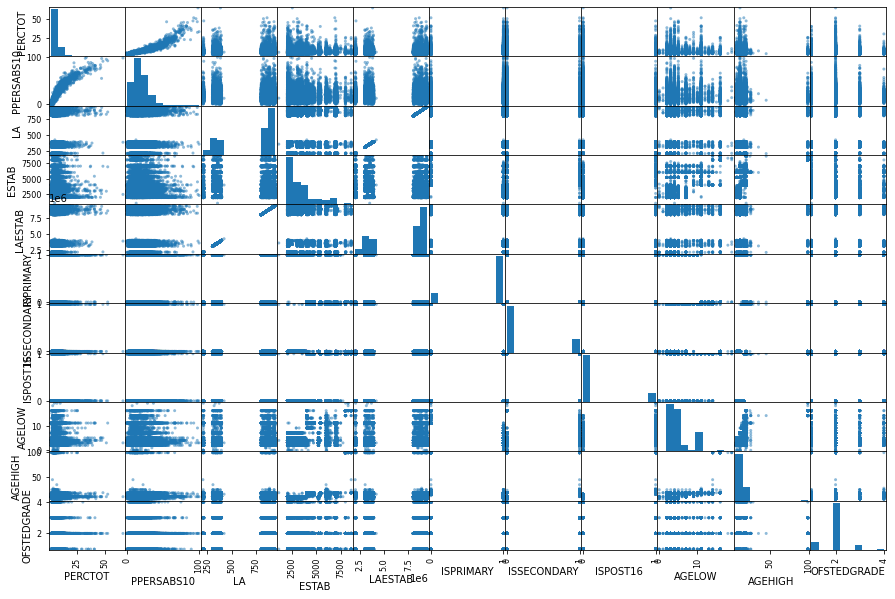

In [62]:
# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(numer_cols, figsize=(15,10), alpha=0.5)
plt.show()


In [74]:
cat_finder = pd.DataFrame(cat_cols.isnull().sum()).reset_index()

In [20]:
cat_finder

,index,0
0,LANAME,0
1,SCHNAME,0
2,STREET,29
3,LOCALITY,8577
4,ADDRESS3,18244
5,TOWN,141
6,POSTCODE,0
7,SCHSTATUS,0
8,OPENDATE,19722
9,CLOSEDATE,18725


In [148]:
def categorical_plot(cat_column):
    # Grouping by 'OFSTEDRATING' and counting 'SCHOOLTYPE'
    grouped_data = df.groupby('OFSTEDRATING')[cat_column].value_counts().unstack().fillna(0)


    # Standardize by the total number of each school type
    total_counts = df[cat_column].value_counts()
    normalized_data = grouped_data.div(total_counts, axis=1)

    # Plotting the bar plot
    normalized_data.plot(kind='barh', stacked=True, figsize=(10, 6))
    plt.title(f'Proportion of {cat_column} by Ofsted Rating')
    plt.xlabel('Ofsted Rating')
    plt.ylabel('Proportion of Schools')
    plt.legend(title=f'{cat_column}')
    plt.show()

def categorical_plot_filtered(cat_column):
    # Grouping by 'OFSTEDRATING' and counting 'SCHOOLTYPE'
    grouped_data = df.groupby('OFSTEDRATING')[cat_column].value_counts()

    # Converting Series to DataFrame and unstacking
    grouped_df = grouped_data.unstack().fillna(0)

    # Get top 10 'SCHOOLTYPE' by total count
    top_col_types = grouped_data.groupby(cat_column).sum().nlargest(10).index

    # Filter to include only top 10 'SCHOOLTYPE'
    filtered_grouped_df = grouped_df[top_col_types]

    # Plotting the bar plot
    filtered_grouped_df.plot(kind='barh', stacked=True, figsize=(10, 6))    
    plt.title(f'Proportion of {cat_column} by Ofsted Rating')
    plt.xlabel('Ofsted Rating')
    plt.ylabel('Proportion of Schools')
    plt.legend(title=f'{cat_column}')
    plt.show()

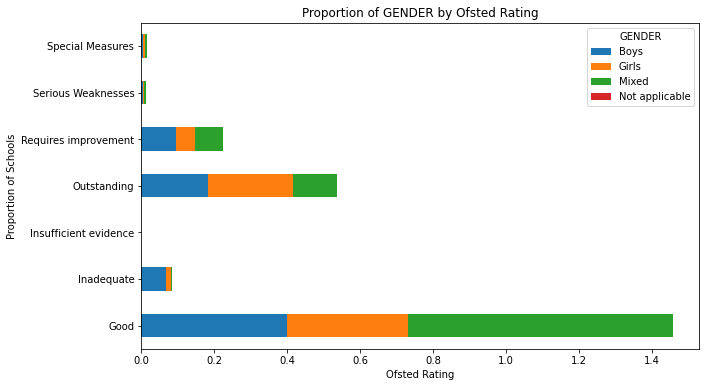

In [149]:
categorical_plot('GENDER')

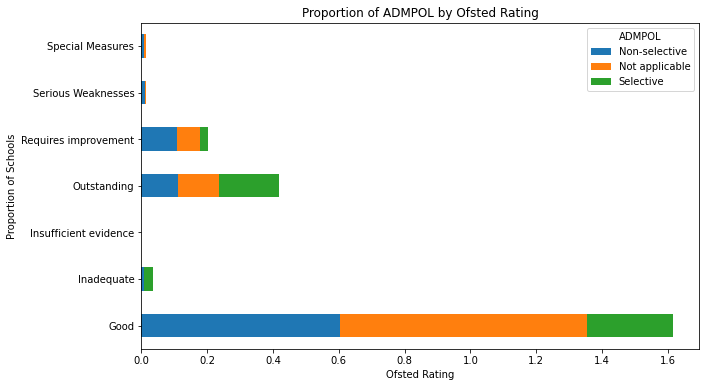

In [150]:
categorical_plot('ADMPOL')

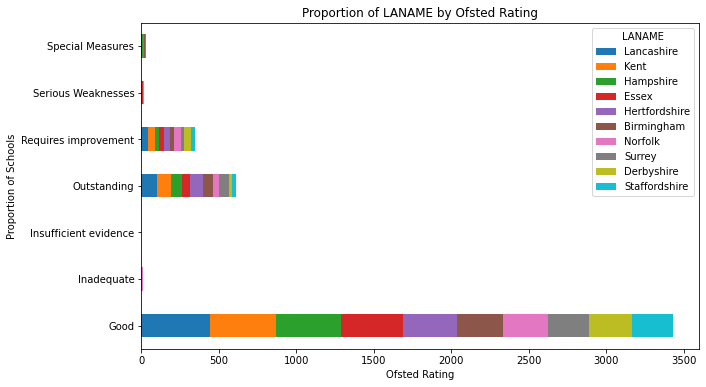

In [151]:
categorical_plot_filtered('LANAME')

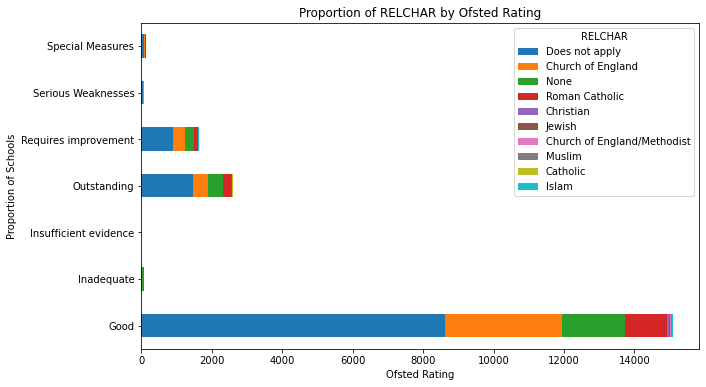

In [152]:
categorical_plot_filtered('RELCHAR')

In [52]:
#Analysing which null features to keep in our categorical dataset
search_list = cat_finder.loc[cat_finder[0]!=0,'index'].values
print(search_list)

['OPENDATE' 'RELCHAR' 'ADMPOL']


In [53]:
# Create dummies for cat_cols
# Leave drop_first to true to avoid Multicollinearity which gives nonsensical R2 values.
dummy_df = pd.get_dummies(cat_cols, prefix_sep='_', dummy_na=True, drop_first=True)

In [54]:
df_clean = dummy_df.join(numer_cols, how='outer').reset_index()
df_clean.head()

,URN,SCHSTATUS_Open,"SCHSTATUS_Open, but proposed to close",SCHSTATUS_nan,MINORGROUP_College,MINORGROUP_Independent school,MINORGROUP_Maintained school,MINORGROUP_Special school,MINORGROUP_nan,SCHOOLTYPE_Academy 16-19 converter,...,ADMPOL_nan,OFSTEDRATING_Inadequate,OFSTEDRATING_Insufficient evidence,OFSTEDRATING_Outstanding,OFSTEDRATING_Requires improvement,OFSTEDRATING_Serious Weaknesses,OFSTEDRATING_Special Measures,OFSTEDRATING_nan,PERCTOT,PPERSABS10
0,100000,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,5.2,9.8
1,100008,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.1,17.1
2,100009,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.0,15.2
3,100010,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,8.7,32.7
4,100011,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,5.5,14.7


In [55]:
df_clean.dtypes.value_counts()

uint8      75
float64     2
int64       1
dtype: int64